In [57]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
from matplotlib.ticker import FormatStrFormatter
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from pyne import serpent
from pyne import nucname
from pyne import data
import re
import itertools
import os
from collections import OrderedDict 

colors = matplotlib.pyplot.rcParams['axes.prop_cycle'].by_key()['color']

def elem_aaa(iso):
    m = re.match(r"(?P<letters>[a-zA-Z]+)(?P<the_rest>.+)$", iso)
    return [m.group('letters'), m.group('the_rest')]

def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final

# Load following

In [9]:
# sss_output_1 = '../../load-following/small_eps/eol/boc/tap.serpent'
#sss_output_1 = '../../load-following/msbr/bol/msbr.serpent'
sss_output_1 = '../../msbr/load-following/small_eps/bol/msbr.serpent'
sss_output_2 = '../../msbr/load-following/small_eps/eol/msbr.serpent'
sss_output_3 = '../../msbr/load-following/small_eps/mol/msbr.serpent'


dep_boc = serpent.parse_dep(os.path.join(os.getcwd(), 
                            sss_output_1+'_dep.m'), make_mats=False)
res_boc = serpent.parse_res(os.path.join(os.getcwd(), 
                            sss_output_1+'_res.m'))

dep_eoc = serpent.parse_dep(os.path.join(os.getcwd(), 
                            sss_output_2+'_dep.m'), make_mats=False)
res_eoc = serpent.parse_res(os.path.join(os.getcwd(), 
                            sss_output_2+'_res.m'))

dep_eoc2 = serpent.parse_dep(os.path.join(os.getcwd(), 
                            sss_output_3+'_dep.m'), make_mats=False)
res_eoc2 = serpent.parse_res(os.path.join(os.getcwd(), 
                            sss_output_3+'_res.m'))

t_indx_shutdown = 0

keff_boc = res_boc['IMP_KEFF'][:, 0]         # K-eff parsing from dictionary
keff_err_boc = res_boc['IMP_KEFF'][:, 1]         # K-eff standart deviation
keff_eoc_3 = res_eoc['IMP_KEFF'][:, 0]         # K-eff parsing from dictionary
keff_err_eoc_3 = res_eoc['IMP_KEFF'][:, 1]         # K-eff standart deviation
keff_eoc_30 = res_eoc2['IMP_KEFF'][:, 0]         # K-eff parsing from dictionary
keff_err_eoc_30 = res_eoc2['IMP_KEFF'][:, 1]         # K-eff standart deviation


days_tap = np.around(dep_boc['DAYS']*24.0, decimals=2)
mdens_tap = dep_boc['MAT_fuel_MDENS']        # mass density for each isotope in material 'fuel'
adens_tap = dep_boc['MAT_fuel_ADENS']
names_tap = dep_boc['NAMES'][0].split()                      # Names of isotopes parsed from *_dep.m file
tot_pow_b = res_boc['TOT_POWER'][:,0]
tot_pow_e = res_boc['TOT_POWER'][:,2]
tot_pow_err = res_boc['TOT_POWER'][:,1]

pow_level = 100*tot_pow_b[:-1]/max(tot_pow_b[:-1])
t_c = days_tap[:-1]+0.5*(days_tap[1:]-days_tap[:-1])
#tot_pow_b=np.insert(tot_pow_b,7,tot_pow_b[6])
#simp_power_load = np.concatenate( (100*np.ones(21),np.zeros(40),100*np.ones(31)) )
print(len(pow_level), len(t_c))
print(days_tap)
print(pow_level)

25 25
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5]
[4.44444444e-18 4.44444444e-18 4.44444444e-18 4.44444444e-18
 4.44444444e-18 4.44444444e-18 4.44444444e-18 4.44444444e-18
 4.44444444e-18 4.44444444e-18 4.44444444e-18 4.44444444e-18
 4.44444444e-18 4.44444444e-18 4.44444444e-18 1.00000000e+02
 1.00000000e+02 1.00000000e+02 1.00000000e+02 1.00000000e+02
 1.00000000e+02 1.00000000e+02 1.00000000e+02 1.00000000e+02
 1.00000000e+02]


[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5]
[0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001
 0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.00011 0.0001
 0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.00011]


<IPython.core.display.Javascript object>


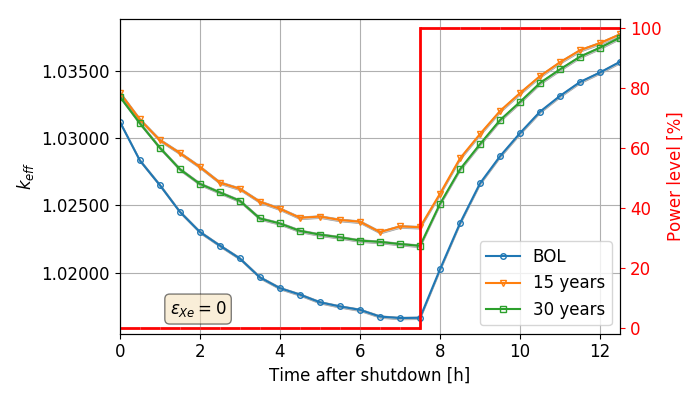

In [44]:
print(np.around(dep_eoc['DAYS']*24.0, decimals=2))
print(keff_err_boc)
fig_keff = matplotlib.pyplot.figure(8, figsize=(7,4))
title = 'Load Following (3d on 100% without reprocessing, \nshutdown for 11 hours with $\\epsilon_{Xe}=0$, \n then back to 100%) \n'
ax1 = fig_keff.add_subplot(111)
ax1.grid(True)
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#ax1.plot(days_lf, keff_2, 'o-', color='g', label='PWR')
#ax1.fill_between(days_lf, keff_2-keff_error2, keff_2+keff_error2,alpha=0.7, 
#                edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.5)

ax1.plot(days_tap, keff_boc, 'o-', label='BOL', linewidth=1.5, alpha=1, markerfacecolor="None", markersize=4)
ax1.plot(days_tap, keff_eoc_3, 'v-', label='15 years', linewidth=1.5, alpha=1, markerfacecolor="None", markersize=4)
ax1.plot(days_tap, keff_eoc_30, 's-', label='30 years', linewidth=1.5, alpha=1, markerfacecolor="None", markersize=4)

ax1.fill_between(days_tap, keff_boc-keff_err_boc, keff_boc+keff_err_boc,alpha=0.7, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.5)
ax1.fill_between(days_tap, keff_eoc_3-keff_err_eoc_3, keff_eoc_3+keff_err_eoc_3,alpha=0.7, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.5)
ax1.fill_between(days_tap, keff_eoc_30-keff_err_eoc_30, keff_eoc_30+keff_err_eoc_30,alpha=0.7, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.5)

ax1.legend(loc=4, fontsize=12)
ax1.set_ylabel(r'$k_{eff}$', fontsize=12)
ax1.set_xlabel('Time after shutdown [h]', fontsize=12)
#ax1.set_title(title)
#ax1.set_ylim(1.039, 1.060)
ax1.set_xlim(0, 12.5)
ax1.tick_params('x', labelsize=12)
#ax1.set_xticks(days_tap)
ax1.tick_params('y', labelsize=12)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.5f'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr = r'$\epsilon_{Xe}=0$'
ax1.text(0.1, 0.11, textstr,transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax2=ax1.twinx()
ax2.bar(days_tap[:-1], 0.0, bottom=pow_level,color='#f77777', alpha=1, align='edge', width=days_tap[1]-days_tap[0], ls="-",
        edgecolor='#fc0303', linewidth=2, fill=False)
ax2.plot([7.5,7.500001],[0, 100], c='red', alpha=1, linewidth=2)
ax2.set_ylim(-2,103)
ax2.set_ylabel('Power level [%]', color='r', fontsize=12)
ax2.tick_params('y', colors='r', labelsize=12)
fig_keff.tight_layout()
fig_keff.show()
#fig_keff.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch6/kl1_keff.png',bbox_inches='tight', dpi=700)

<IPython.core.display.Javascript object>


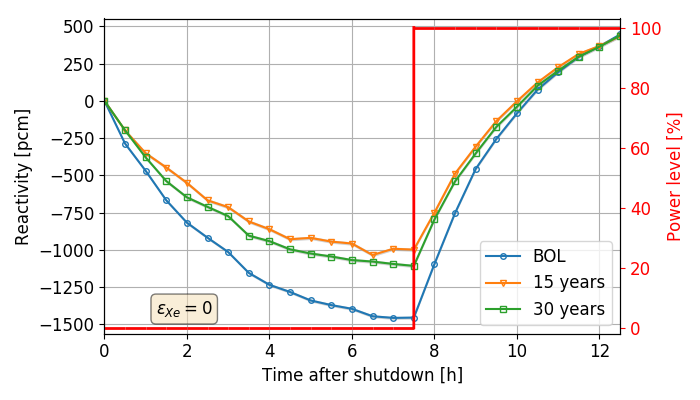

Maximum reactivity drop after shutdown -1457.000000 pcm (BOL)
Maximum reactivity drop after shutdown -1108.000000 pcm (MOL)
Maximum reactivity drop after shutdown -1035.000000 pcm (EOL)


In [53]:
rho_boc = 1e+5*(keff_boc-keff_boc[t_indx_shutdown])
rho_eoc_3 = 1e+5*(keff_eoc_3-keff_eoc_3[t_indx_shutdown])
rho_eoc_30 = 1e+5*(keff_eoc_30-keff_eoc_30[t_indx_shutdown])

fig_rho = matplotlib.pyplot.figure(9, figsize=(7,4))
ax1 = fig_rho.add_subplot(111)
ax1.grid(True)
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.plot(days_tap, rho_boc, 'o-', label='BOL', linewidth=1.5, alpha=1, markerfacecolor="None", markersize=4)
ax1.plot(days_tap, rho_eoc_3, 'v-', label='15 years', linewidth=1.5, alpha=1, markerfacecolor="None", markersize=4)
ax1.plot(days_tap, rho_eoc_30, 's-', label='30 years', linewidth=1.5, alpha=1, markerfacecolor="None", markersize=4)

ax1.fill_between(days_tap, rho_boc-1e5*keff_err_boc, rho_boc+1e5*keff_err_boc,
                alpha=0.7, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0)
ax1.fill_between(days_tap, rho_eoc_3-1e5*keff_err_eoc_3, rho_eoc_3+1e5*keff_err_eoc_3,
                alpha=0.7, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0)
ax1.fill_between(days_tap, rho_eoc_30-1e5*keff_err_eoc_30, rho_eoc_30+1e5*keff_err_eoc_30,
                alpha=0.7, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0)

ax1.legend(loc=4, fontsize=12)
ax1.set_ylabel('Reactivity [pcm]',fontsize=12)
ax1.set_xlabel('Time after shutdown [h]',  fontsize=12)
ax1.tick_params('y', labelsize=12)
ax1.tick_params('x', labelsize=12)
#ax1.set_xticks(days_tap)
#ax1.set_title(title)
#ax1.set_ylim([-1350,600])
ax1.set_xlim(0, 12.5)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr = r'$\epsilon_{Xe}=0$'
ax1.text(0.1, 0.11,textstr,transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax2=ax1.twinx()
#ax2.plot(days_tap, 100*tot_pow_b/max(tot_pow_b), 'o-', color='r', markerfacecolor='None')
ax2.bar(days_tap[:-1], 0.0, bottom=pow_level,color='#f77777', alpha=1, align='edge', width=days_tap[1]-days_tap[0], ls="-",
        edgecolor='#fc0303', linewidth=2, fill=False)
ax2.plot([7.5,7.50001],[0, 100], c='red', alpha=1, linewidth=2)
ax2.set_ylabel('Power level [%]', color='r', fontsize=12)
ax2.tick_params('y',  colors='r', labelsize=12)
ax2.set_ylim(-2,103)

fig_rho.tight_layout()
fig_rho.show()
#fig_rho.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch6/kl1_rho.png',bbox_inches='tight', dpi=700)
print('Maximum reactivity drop after shutdown %f pcm (BOL)' %(np.amin(rho_boc)))
print('Maximum reactivity drop after shutdown %f pcm (MOL)' %(np.amin(rho_eoc_30)))
print('Maximum reactivity drop after shutdown %f pcm (EOL)' %(np.amin(rho_eoc_3)))

<IPython.core.display.Javascript object>


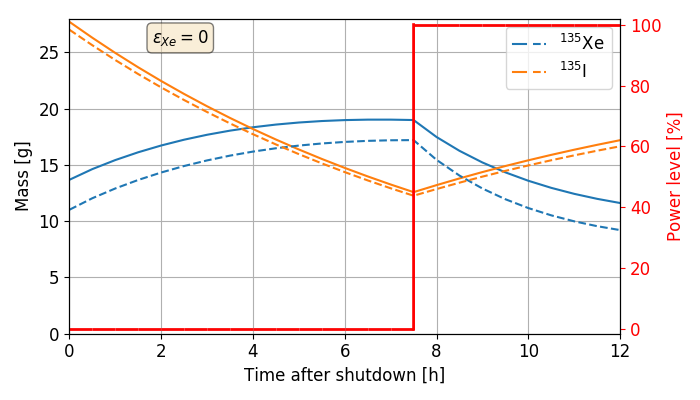

Xe135 concentration at t=0 1.009070e+15 1/cm3; I135 st t=0 2.474520e+15 1/cm3
I135/Xe135 ratio at the beginning of the transient 2.452278
Xe135 concentration peak at t=7.500000 hrs
Xe135 for BOL [11.01109034 12.03585132 12.90332771 13.65940433 14.32088613 14.8969793
 15.39455195 15.81959541 16.17761391 16.473722   16.71274197 16.89915514
 17.03715057 17.13067377 17.18337799 17.19872164 15.44452841 14.04703851
 12.89850542 11.94724783 11.16131198 10.51449189  9.98438096  9.55310262
  9.2047287   8.92615621]
Xe135 for 30 years [13.67260474 14.62318039 15.42543409 16.11896707 16.71912298 17.23476704
 17.67266994 18.03887172 18.33887661 18.57794529 18.76080263 18.89202737
 18.97580857 19.01609174 19.01662755 18.98077699 17.47437153 16.24658727
 15.21130493 14.33359944 13.5876545  12.95671387 12.42548261 11.98085773
 11.61027205 11.305591  ]
Xe135 max for BOL 17.19872164
Xe135 max for 30 years 19.01662755


In [97]:
target_iso = ['Xe135', 'I135']
color_d = {'Xe135' : 'blue', 'I135': 'red', 'Te135': 'orange'}
style_d = {'Xe135' : '-', 'I135': '--', 'Te135': '+--'}
#style = itertools.cycle(('-', '-', '--', '-', '-', '-'))
# Initialize figure
fig_10 = matplotlib.pyplot.figure(11, figsize=(7,4))
ax = fig_10.add_subplot(111)
ax.grid(True)


x1, = ax.plot(days_tap, dep_eoc['MAT_fuel_VOLUME'][0]*dep_eoc['MAT_fuel_MDENS'][dep_eoc['NAMES'][0].split().index('Xe135'),:], '-', fillstyle='none', label=iso_name+' (30 years)')
i1, = ax.plot(days_tap, dep_eoc['MAT_fuel_VOLUME'][0]*dep_eoc['MAT_fuel_MDENS'][dep_eoc['NAMES'][0].split().index('I135'),:], '-', fillstyle='none', label=iso_name+' (30 years)')
ax.set_prop_cycle(color=colors[0:])
x2, = ax.plot(days_tap, dep_boc['MAT_fuel_VOLUME'][0]*dep_boc['MAT_fuel_MDENS'][names_tap.index('Xe135'),:], '--', fillstyle='none', label=iso_name)
i2, = ax.plot(days_tap, dep_boc['MAT_fuel_VOLUME'][0]*dep_boc['MAT_fuel_MDENS'][names_tap.index('I135'),:], '--', fillstyle='none', label=iso_name)

    
#ax.legend(loc=0, fontsize=12)
l=ax.legend([(x1,x2), (i1,i2)], [r'$^{135}$Xe', r'$^{135}$I'], scatterpoints=2,handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=12)
#ax.set_ylabel('Mass [t]')
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params('y', labelsize=12)
ax.tick_params('x', labelsize=12)
#ax.set_ylabel(r'Number density [1/cm$^3$]', fontsize=14)
ax.set_ylabel(r'Mass [g]', fontsize=12)
#ax.set_ylabel(r'Mass density [g/cm$^3$]')
ax.set_xlabel('Time after shutdown [h]', fontsize=12)
#ax.set_title('Isotope mass density in material FUEL')
ax.set_xlim(0, 12)
ax.set_ylim(0, 28)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr = r'$\epsilon_{Xe}=0$'
ax.text(0.15, 0.97, textstr,transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)


ax2=ax.twinx()
#ax2.plot(days_tap, 100*tot_pow_b/max(tot_pow_b), 'o-', color='r', markerfacecolor='None')
ax2.bar(days_tap[:-1], 0.0, bottom=pow_level,color='#f77777', alpha=1, align='edge', width=days_tap[1]-days_tap[0], ls="-",
        edgecolor='#fc0303', linewidth=2, fill=False)
ax2.plot([7.5,7.50001],[0, 100], c='red', alpha=1, linewidth=2)
ax2.set_ylabel('Power level [%]', color='r', fontsize=12)
ax2.tick_params('y',  colors='r', labelsize=12)
ax2.set_ylim(-1.5,102)

fig_10.tight_layout()
fig_10.show()
fig_10.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch6/kl1_xe_i_ratio.png',bbox_inches='tight', dpi=700)

print('Xe135 concentration at t=0 %e 1/cm3; I135 st t=0 %e 1/cm3'
         %(1e24*adens_tap[names_tap.index('Xe135'),t_indx_shutdown], 1e24*adens_tap[names_tap.index('I135'),t_indx_shutdown]))
print('I135/Xe135 ratio at the beginning of the transient %f' 
        %(adens_tap[names_tap.index('I135'),t_indx_shutdown]/adens_tap[names_tap.index('Xe135'),t_indx_shutdown]))
print('Xe135 concentration peak at t=%f hrs' %(days_tap[int(np.argmax(adens_tap[names_tap.index('Xe135'),:-4]))]))
print('Xe135 for BOL', dep_boc['MAT_fuel_VOLUME'][0]*dep_boc['MAT_fuel_MDENS'][names_tap.index('Xe135'),:])
print('Xe135 for 30 years', dep_boc['MAT_fuel_VOLUME'][0]*dep_eoc['MAT_fuel_MDENS'][names_tap.index('Xe135'),:])
print('Xe135 max for BOL', np.amax(dep_boc['MAT_fuel_VOLUME'][0]*dep_boc['MAT_fuel_MDENS'][names_tap.index('Xe135'),:]))
print('Xe135 max for 30 years', np.amax(dep_boc['MAT_fuel_VOLUME'][0]*dep_eoc['MAT_fuel_MDENS'][names_tap.index('Xe135'),:]))
#print(days_tap[:-17])

[1.e-10 1.e-10 1.e-10 1.e-10 1.e-10]
[    0.  1800.  3600.  5400.  7200.  9000. 10800. 12600. 14400. 16200.
 18000. 19800. 21600. 23400. 25200. 27000. 28800. 30600. 32400. 34200.
 36000. 37800.]


<IPython.core.display.Javascript object>


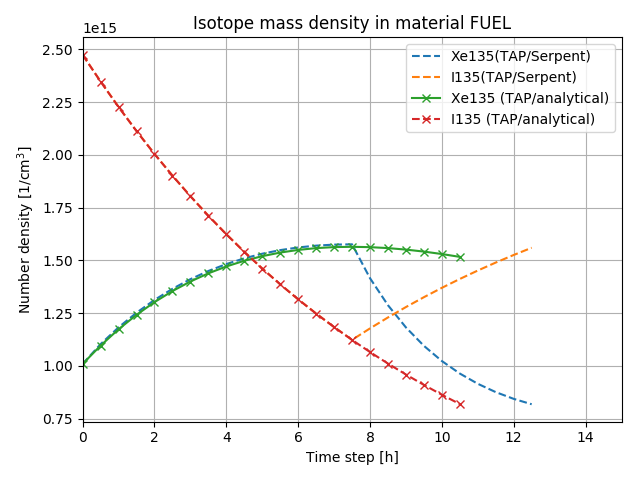

Xe135 peak concentration 1.564402e+15 1/cm3 at t=7.500000 h
Or 7.500000 hr after shutdown
Xe135 concentration peak (Nmax/N0) 55.033998 [%]


In [91]:
print(tot_pow_b[:5])
#print(adens_tap[names_tap.index('Xe135')])
#print(adens_tap[names_tap.index('Xe135'),14])
N_xe_0 = 1e+24*adens_tap[names_tap.index('Xe135'), t_indx_shutdown]

N_i_0 = 1e+24*adens_tap[names_tap.index('I135'), t_indx_shutdown]

t = days_tap[4:]
t = (t - days_tap[4])*3600 # to sec
print(t)

lamb_xe = data.decay_const('Xe-135')
lamb_i = data.decay_const('I-135')

#for i in range(1,len(N_xe)-1):
#    N_xe[i+1] = (N_xe[i]- N_i_d[i+1])* np.exp(-data.decay_const('Xe-135')*(t[i+1]-t[i])) 
N_xe = N_xe_0*np.exp(-lamb_xe*t) + \
    (N_i_0*lamb_i)/(lamb_i-lamb_xe)*(np.exp(-lamb_xe*t) - np.exp(-lamb_i*t))
N_i = N_i_0*np.exp(-lamb_i*t)

# Initialize figure
fig_11 = matplotlib.pyplot.figure(12) #, figsize=(10,6))
ax = fig_11.add_subplot(111)
ax.grid(True)
#ax.set_ylim(0,1.01)
for i in ['Xe135','I135']:#, names.index('U233'), names.index('U235')]:
    #ax.plot(days_lf, 1e+24*adens[names.index(i)], 'v--', label=i+'(PWR/Serpent)')
    ax.plot(days_tap, 1e+24*adens_tap[names_tap.index(i)], '--', label=i+'(TAP/Serpent)')
ax.plot(t/3600+days_tap[t_indx_shutdown], N_xe, 'x-', label='Xe135 (TAP/analytical)')
ax.plot(t/3600+days_tap[t_indx_shutdown], N_i, 'x--', label='I135 (TAP/analytical)')
ax.legend(loc=0)
#ax.set_ylabel('Mass [t]')
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_ylabel(r'Number density [1/cm$^3$]')
#ax.set_ylabel(r'Mass density [g/cm$^3$]')
ax.set_xlabel('Time step [h]')
ax.set_title('Isotope mass density in material FUEL')
ax.set_xlim([0,15])

#zoom peak Xe135
#ax.set_xlim([9, 10])
#ax.set_ylim([8.0e+14, 8.74e+14])
fig_11.tight_layout()
fig_11.show()
#fig_11.savefig('6_tap_vs_analytical_xe_i_density.png',bbox_inches='tight')
print('Xe135 peak concentration %e 1/cm3 at t=%f h' %(np.amax(N_xe),
                                                      t[int(np.argmax(N_xe))]/3600+days_tap[t_indx_shutdown]))
print('Or %f hr after shutdown' %(t[int(np.argmax(N_xe))]/3600))
print('Xe135 concentration peak (Nmax/N0) %f [%%]' 
      %(100*(np.amax(N_xe)-N_xe[0])/N_xe[0]))

In [ ]:
nom = lamb_xe*(lamb_i*(N_xe_0+N_i_0)-lamb_xe*N_xe_0)
den = lamb_i**2 * N_i_0
t_peak = np.log(nom/den) / (lamb_xe-lamb_i)

print('Analytical solution for the Xe-135 peak %f s, %f h' %(t_peak, t_peak/3600))

print('\nSecond method')
t = np.arange(0, 5*24*3600, 0.1)
N_xe = N_xe_0*np.exp(-lamb_xe*t) + \
    (N_i_0*lamb_i)/(lamb_i-lamb_xe)*(np.exp(-lamb_xe*t) - np.exp(-lamb_i*t))
print('Xe135 peak concentration %e 1/cm3 at t=%f h' %(np.amax(N_xe),
                                                      np.argmax(N_xe)/36000))

# Manual tmax calculation

In [89]:
iso_map = OrderedDict([('H1', 0), ('H2', 1), ('H3', 2), ('He3', 3), ('He4', 4), ('He6', 5), ('Li6', 6), ('Li7', 7), ('Li8', 8), ('Li9', 9), ('Be8', 10), ('Be9', 11), ('Be10', 12), ('Be11', 13), ('B10', 14), ('B11', 15), ('B12', 16), ('C12', 17), ('C13', 18), ('C14', 19), ('C15', 20), ('N13', 21), ('N14', 22), ('N15', 23), ('N16', 24), ('N17', 25), ('O15', 26), ('O16', 27), ('O17', 28), ('O18', 29), ('O19', 30), ('F18', 31), ('F19', 32), ('F20', 33), ('Ne20', 34), ('Cr66', 35), ('Cr67', 36), ('Mn66', 37), ('Mn67', 38), ('Mn68', 39), ('Mn69', 40), ('Fe65', 41), ('Fe66', 42), ('Fe67', 43), ('Fe68', 44), ('Fe69', 45), ('Fe70', 46), ('Fe71', 47), ('Fe72', 48), ('Co65', 49), ('Co66', 50), ('Co67', 51), ('Co68', 52), ('Co69', 53), ('Co70', 54), ('Co71', 55), ('Co72', 56), ('Co73', 57), ('Co74', 58), ('Co75', 59), ('Ni65', 60), ('Ni66', 61), ('Ni67', 62), ('Ni68', 63), ('Ni69', 64), ('Ni70', 65), ('Ni71', 66), ('Ni72', 67), ('Ni73', 68), ('Ni74', 69), ('Ni75', 70), ('Ni76', 71), ('Ni77', 72), ('Ni78', 73), ('Cu65', 74), ('Cu66', 75), ('Cu67', 76), ('Cu68', 77), ('Cu68m1', 78), ('Cu69', 79), ('Cu70', 80), ('Cu70m1', 81), ('Cu71', 82), ('Cu72', 83), ('Cu73', 84), ('Cu74', 85), ('Cu75', 86), ('Cu76', 87), ('Cu77', 88), ('Cu78', 89), ('Cu79', 90), ('Cu80', 91), ('Zn65', 92), ('Zn66', 93), ('Zn67', 94), ('Zn68', 95), ('Zn69', 96), ('Zn69m1', 97), ('Zn70', 98), ('Zn71', 99), ('Zn71m1', 100), ('Zn72', 101), ('Zn73', 102), ('Zn74', 103), ('Zn75', 104), ('Zn76', 105), ('Zn77', 106), ('Zn78', 107), ('Zn79', 108), ('Zn80', 109), ('Zn81', 110), ('Zn82', 111), ('Zn83', 112), ('Ga66', 113), ('Ga67', 114), ('Ga68', 115), ('Ga69', 116), ('Ga70', 117), ('Ga71', 118), ('Ga72', 119), ('Ga73', 120), ('Ga74', 121), ('Ga74m1', 122), ('Ga75', 123), ('Ga76', 124), ('Ga77', 125), ('Ga78', 126), ('Ga79', 127), ('Ga80', 128), ('Ga81', 129), ('Ga82', 130), ('Ga83', 131), ('Ga84', 132), ('Ga85', 133), ('Ga86', 134), ('Ge68', 135), ('Ge69', 136), ('Ge70', 137), ('Ge71', 138), ('Ge71m1', 139), ('Ge72', 140), ('Ge73', 141), ('Ge73m1', 142), ('Ge74', 143), ('Ge75', 144), ('Ge75m1', 145), ('Ge76', 146), ('Ge77', 147), ('Ge77m1', 148), ('Ge78', 149), ('Ge79', 150), ('Ge79m1', 151), ('Ge80', 152), ('Ge81', 153), ('Ge82', 154), ('Ge83', 155), ('Ge84', 156), ('Ge85', 157), ('Ge86', 158), ('Ge87', 159), ('Ge88', 160), ('Ge89', 161), ('As71', 162), ('As72', 163), ('As73', 164), ('As74', 165), ('As75', 166), ('As75m1', 167), ('As76', 168), ('As77', 169), ('As78', 170), ('As79', 171), ('As80', 172), ('As81', 173), ('As82', 174), ('As82m1', 175), ('As83', 176), ('As84', 177), ('As85', 178), ('As86', 179), ('As87', 180), ('As88', 181), ('As89', 182), ('As90', 183), ('As91', 184), ('As92', 185), ('Se73', 186), ('Se73m1', 187), ('Se74', 188), ('Se75', 189), ('Se76', 190), ('Se77', 191), ('Se77m1', 192), ('Se78', 193), ('Se79', 194), ('Se79m1', 195), ('Se80', 196), ('Se81', 197), ('Se81m1', 198), ('Se82', 199), ('Se83', 200), ('Se83m1', 201), ('Se84', 202), ('Se85', 203), ('Se86', 204), ('Se87', 205), ('Se88', 206), ('Se89', 207), ('Se90', 208), ('Se91', 209), ('Se92', 210), ('Se93', 211), ('Se94', 212), ('Br75', 213), ('Br76', 214), ('Br77', 215), ('Br77m1', 216), ('Br78', 217), ('Br79', 218), ('Br79m1', 219), ('Br80', 220), ('Br80m1', 221), ('Br81', 222), ('Br82', 223), ('Br82m1', 224), ('Br83', 225), ('Br84', 226), ('Br84m1', 227), ('Br85', 228), ('Br86', 229), ('Br87', 230), ('Br88', 231), ('Br89', 232), ('Br90', 233), ('Br91', 234), ('Br92', 235), ('Br93', 236), ('Br94', 237), ('Br95', 238), ('Br96', 239), ('Br97', 240), ('Kr77', 241), ('Kr78', 242), ('Kr79', 243), ('Kr79m1', 244), ('Kr80', 245), ('Kr81', 246), ('Kr81m1', 247), ('Kr82', 248), ('Kr83', 249), ('Kr83m1', 250), ('Kr84', 251), ('Kr85', 252), ('Kr85m1', 253), ('Kr86', 254), ('Kr87', 255), ('Kr88', 256), ('Kr89', 257), ('Kr90', 258), ('Kr91', 259), ('Kr92', 260), ('Kr93', 261), ('Kr94', 262), ('Kr95', 263), ('Kr96', 264), ('Kr97', 265), ('Kr98', 266), ('Kr99', 267), ('Kr100', 268), ('Rb79', 269), ('Rb81', 270), ('Rb83', 271), ('Rb84', 272), ('Rb85', 273), ('Rb86', 274), ('Rb86m1', 275), ('Rb87', 276), ('Rb88', 277), ('Rb89', 278), ('Rb90', 279), ('Rb90m1', 280), ('Rb91', 281), ('Rb92', 282), ('Rb93', 283), ('Rb94', 284), ('Rb95', 285), ('Rb96', 286), ('Rb97', 287), ('Rb98', 288), ('Rb99', 289), ('Rb100', 290), ('Rb101', 291), ('Rb102', 292), ('Sr83', 293), ('Sr84', 294), ('Sr85', 295), ('Sr85m1', 296), ('Sr86', 297), ('Sr87', 298), ('Sr87m1', 299), ('Sr88', 300), ('Sr89', 301), ('Sr90', 302), ('Sr91', 303), ('Sr92', 304), ('Sr93', 305), ('Sr94', 306), ('Sr95', 307), ('Sr96', 308), ('Sr97', 309), ('Sr98', 310), ('Sr99', 311), ('Sr100', 312), ('Sr101', 313), ('Sr102', 314), ('Sr103', 315), ('Sr104', 316), ('Sr105', 317), ('Y85', 318), ('Y87', 319), ('Y87m1', 320), ('Y88', 321), ('Y89', 322), ('Y89m1', 323), ('Y90', 324), ('Y90m1', 325), ('Y91', 326), ('Y91m1', 327), ('Y92', 328), ('Y93', 329), ('Y93m1', 330), ('Y94', 331), ('Y95', 332), ('Y96', 333), ('Y96m1', 334), ('Y97', 335), ('Y98', 336), ('Y98m1', 337), ('Y99', 338), ('Y100', 339), ('Y101', 340), ('Y102', 341), ('Y103', 342), ('Y104', 343), ('Y105', 344), ('Y106', 345), ('Y107', 346), ('Y108', 347), ('Zr87', 348), ('Zr88', 349), ('Zr89', 350), ('Zr89m1', 351), ('Zr90', 352), ('Zr90m1', 353), ('Zr91', 354), ('Zr92', 355), ('Zr93', 356), ('Zr94', 357), ('Zr95', 358), ('Zr96', 359), ('Zr97', 360), ('Zr98', 361), ('Zr99', 362), ('Zr100', 363), ('Zr101', 364), ('Zr102', 365), ('Zr103', 366), ('Zr104', 367), ('Zr105', 368), ('Zr106', 369), ('Zr107', 370), ('Zr108', 371), ('Zr109', 372), ('Zr110', 373), ('Nb89', 374), ('Nb90', 375), ('Nb91', 376), ('Nb91m1', 377), ('Nb92', 378), ('Nb93', 379), ('Nb93m1', 380), ('Nb94', 381), ('Nb94m1', 382), ('Nb95', 383), ('Nb95m1', 384), ('Nb96', 385), ('Nb97', 386), ('Nb97m1', 387), ('Nb98', 388), ('Nb98m1', 389), ('Nb99', 390), ('Nb99m1', 391), ('Nb100', 392), ('Nb100m1', 393), ('Nb101', 394), ('Nb102', 395), ('Nb102m1', 396), ('Nb103', 397), ('Nb104', 398), ('Nb104m1', 399), ('Nb105', 400), ('Nb106', 401), ('Nb107', 402), ('Nb108', 403), ('Nb109', 404), ('Nb110', 405), ('Nb111', 406), ('Nb112', 407), ('Nb113', 408), ('Mo91', 409), ('Mo92', 410), ('Mo93', 411), ('Mo93m1', 412), ('Mo94', 413), ('Mo95', 414), ('Mo96', 415), ('Mo97', 416), ('Mo98', 417), ('Mo99', 418), ('Mo100', 419), ('Mo101', 420), ('Mo102', 421), ('Mo103', 422), ('Mo104', 423), ('Mo105', 424), ('Mo106', 425), ('Mo107', 426), ('Mo108', 427), ('Mo109', 428), ('Mo110', 429), ('Mo111', 430), ('Mo112', 431), ('Mo113', 432), ('Mo114', 433), ('Mo115', 434), ('Tc95', 435), ('Tc95m1', 436), ('Tc96', 437), ('Tc97', 438), ('Tc97m1', 439), ('Tc98', 440), ('Tc99', 441), ('Tc99m1', 442), ('Tc100', 443), ('Tc101', 444), ('Tc102', 445), ('Tc102m1', 446), ('Tc103', 447), ('Tc104', 448), ('Tc105', 449), ('Tc106', 450), ('Tc107', 451), ('Tc108', 452), ('Tc109', 453), ('Tc110', 454), ('Tc111', 455), ('Tc112', 456), ('Tc113', 457), ('Tc114', 458), ('Tc115', 459), ('Tc116', 460), ('Tc117', 461), ('Tc118', 462), ('Ru96', 463), ('Ru97', 464), ('Ru98', 465), ('Ru99', 466), ('Ru100', 467), ('Ru101', 468), ('Ru102', 469), ('Ru103', 470), ('Ru104', 471), ('Ru105', 472), ('Ru106', 473), ('Ru107', 474), ('Ru108', 475), ('Ru109', 476), ('Ru110', 477), ('Ru111', 478), ('Ru112', 479), ('Ru113', 480), ('Ru114', 481), ('Ru115', 482), ('Ru116', 483), ('Ru117', 484), ('Ru118', 485), ('Ru119', 486), ('Ru120', 487), ('Rh99', 488), ('Rh100', 489), ('Rh101', 490), ('Rh101m1', 491), ('Rh102', 492), ('Rh102m1', 493), ('Rh103', 494), ('Rh103m1', 495), ('Rh104', 496), ('Rh104m1', 497), ('Rh105', 498), ('Rh105m1', 499), ('Rh106', 500), ('Rh106m1', 501), ('Rh107', 502), ('Rh108', 503), ('Rh108m1', 504), ('Rh109', 505), ('Rh110', 506), ('Rh110m1', 507), ('Rh111', 508), ('Rh112', 509), ('Rh113', 510), ('Rh114', 511), ('Rh115', 512), ('Rh116', 513), ('Rh117', 514), ('Rh118', 515), ('Rh119', 516), ('Rh120', 517), ('Rh121', 518), ('Rh122', 519), ('Pd100', 520), ('Pd101', 521), ('Pd102', 522), ('Pd103', 523), ('Pd104', 524), ('Pd105', 525), ('Pd106', 526), ('Pd107', 527), ('Pd107m1', 528), ('Pd108', 529), ('Pd109', 530), ('Pd109m1', 531), ('Pd110', 532), ('Pd111', 533), ('Pd111m1', 534), ('Pd112', 535), ('Pd113', 536), ('Pd114', 537), ('Pd115', 538), ('Pd116', 539), ('Pd117', 540), ('Pd118', 541), ('Pd119', 542), ('Pd120', 543), ('Pd121', 544), ('Pd122', 545), ('Pd123', 546), ('Pd124', 547), ('Ag103', 548), ('Ag104', 549), ('Ag105', 550), ('Ag105m1', 551), ('Ag106', 552), ('Ag106m1', 553), ('Ag107', 554), ('Ag107m1', 555), ('Ag108', 556), ('Ag108m1', 557), ('Ag109', 558), ('Ag109m1', 559), ('Ag110', 560), ('Ag110m1', 561), ('Ag111', 562), ('Ag111m1', 563), ('Ag112', 564), ('Ag113', 565), ('Ag113m1', 566), ('Ag114', 567), ('Ag115', 568), ('Ag115m1', 569), ('Ag116', 570), ('Ag116m1', 571), ('Ag117', 572), ('Ag117m1', 573), ('Ag118', 574), ('Ag118m1', 575), ('Ag119', 576), ('Ag120', 577), ('Ag120m1', 578), ('Ag121', 579), ('Ag122', 580), ('Ag122m1', 581), ('Ag123', 582), ('Ag124', 583), ('Ag125', 584), ('Ag126', 585), ('Ag127', 586), ('Ag128', 587), ('Ag129', 588), ('Ag130', 589), ('Cd104', 590), ('Cd105', 591), ('Cd106', 592), ('Cd107', 593), ('Cd108', 594), ('Cd109', 595), ('Cd110', 596), ('Cd111', 597), ('Cd111m1', 598), ('Cd112', 599), ('Cd113', 600), ('Cd113m1', 601), ('Cd114', 602), ('Cd115', 603), ('Cd115m1', 604), ('Cd116', 605), ('Cd117', 606), ('Cd117m1', 607), ('Cd118', 608), ('Cd119', 609), ('Cd119m1', 610), ('Cd120', 611), ('Cd121', 612), ('Cd121m1', 613), ('Cd122', 614), ('Cd123', 615), ('Cd123m1', 616), ('Cd124', 617), ('Cd125', 618), ('Cd126', 619), ('Cd127', 620), ('Cd128', 621), ('Cd129', 622), ('Cd130', 623), ('Cd131', 624), ('Cd132', 625), ('In109', 626), ('In110', 627), ('In110m1', 628), ('In111', 629), ('In111m1', 630), ('In112', 631), ('In112m1', 632), ('In113', 633), ('In113m1', 634), ('In114', 635), ('In114m1', 636), ('In115', 637), ('In115m1', 638), ('In116', 639), ('In116m1', 640), ('In117', 641), ('In117m1', 642), ('In118', 643), ('In118m1', 644), ('In119', 645), ('In119m1', 646), ('In120', 647), ('In120m1', 648), ('In121', 649), ('In121m1', 650), ('In122', 651), ('In122m1', 652), ('In123', 653), ('In123m1', 654), ('In124', 655), ('In124m1', 656), ('In125', 657), ('In125m1', 658), ('In126', 659), ('In126m1', 660), ('In127', 661), ('In127m1', 662), ('In128', 663), ('In128m1', 664), ('In129', 665), ('In129m1', 666), ('In130', 667), ('In131', 668), ('In132', 669), ('In133', 670), ('In134', 671), ('In135', 672), ('Sn110', 673), ('Sn111', 674), ('Sn112', 675), ('Sn113', 676), ('Sn113m1', 677), ('Sn114', 678), ('Sn115', 679), ('Sn116', 680), ('Sn117', 681), ('Sn117m1', 682), ('Sn118', 683), ('Sn119', 684), ('Sn119m1', 685), ('Sn120', 686), ('Sn121', 687), ('Sn121m1', 688), ('Sn122', 689), ('Sn123', 690), ('Sn123m1', 691), ('Sn124', 692), ('Sn125', 693), ('Sn125m1', 694), ('Sn126', 695), ('Sn127', 696), ('Sn127m1', 697), ('Sn128', 698), ('Sn128m1', 699), ('Sn129', 700), ('Sn129m1', 701), ('Sn130', 702), ('Sn130m1', 703), ('Sn131', 704), ('Sn131m1', 705), ('Sn132', 706), ('Sn133', 707), ('Sn134', 708), ('Sn135', 709), ('Sn136', 710), ('Sn137', 711), ('Sb115', 712), ('Sb117', 713), ('Sb118', 714), ('Sb118m1', 715), ('Sb119', 716), ('Sb120', 717), ('Sb120m1', 718), ('Sb121', 719), ('Sb122', 720), ('Sb122m1', 721), ('Sb123', 722), ('Sb124', 723), ('Sb124m1', 724), ('Sb125', 725), ('Sb126', 726), ('Sb126m1', 727), ('Sb127', 728), ('Sb128', 729), ('Sb128m1', 730), ('Sb129', 731), ('Sb130', 732), ('Sb130m1', 733), ('Sb131', 734), ('Sb132', 735), ('Sb132m1', 736), ('Sb133', 737), ('Sb134', 738), ('Sb134m1', 739), ('Sb135', 740), ('Sb136', 741), ('Sb137', 742), ('Sb138', 743), ('Sb139', 744), ('Te118', 745), ('Te119', 746), ('Te120', 747), ('Te121', 748), ('Te121m1', 749), ('Te122', 750), ('Te123', 751), ('Te123m1', 752), ('Te124', 753), ('Te125', 754), ('Te125m1', 755), ('Te126', 756), ('Te127', 757), ('Te127m1', 758), ('Te128', 759), ('Te129', 760), ('Te129m1', 761), ('Te130', 762), ('Te131', 763), ('Te131m1', 764), ('Te132', 765), ('Te133', 766), ('Te133m1', 767), ('Te134', 768), ('Te135', 769), ('Te136', 770), ('Te137', 771), ('Te138', 772), ('Te139', 773), ('Te140', 774), ('Te141', 775), ('Te142', 776), ('I121', 777), ('I123', 778), ('I124', 779), ('I125', 780), ('I126', 781), ('I127', 782), ('I128', 783), ('I129', 784), ('I130', 785), ('I130m1', 786), ('I131', 787), ('I132', 788), ('I132m1', 789), ('I133', 790), ('I133m1', 791), ('I134', 792), ('I134m1', 793), ('I135', 794), ('I136', 795), ('I136m1', 796), ('I137', 797), ('I138', 798), ('I139', 799), ('I140', 800), ('I141', 801), ('I142', 802), ('I143', 803), ('I144', 804), ('Xe124', 805), ('Xe125', 806), ('Xe125m1', 807), ('Xe126', 808), ('Xe127', 809), ('Xe127m1', 810), ('Xe128', 811), ('Xe129', 812), ('Xe129m1', 813), ('Xe130', 814), ('Xe131', 815), ('Xe131m1', 816), ('Xe132', 817), ('Xe133', 818), ('Xe133m1', 819), ('Xe134', 820), ('Xe134m1', 821), ('Xe135', 822), ('Xe135m1', 823), ('Xe136', 824), ('Xe137', 825), ('Xe138', 826), ('Xe139', 827), ('Xe140', 828), ('Xe141', 829), ('Xe142', 830), ('Xe143', 831), ('Xe144', 832), ('Xe145', 833), ('Xe146', 834), ('Xe147', 835), ('Cs127', 836), ('Cs129', 837), ('Cs130', 838), ('Cs131', 839), ('Cs132', 840), ('Cs133', 841), ('Cs134', 842), ('Cs134m1', 843), ('Cs135', 844), ('Cs135m1', 845), ('Cs136', 846), ('Cs136m1', 847), ('Cs137', 848), ('Cs138', 849), ('Cs138m1', 850), ('Cs139', 851), ('Cs140', 852), ('Cs141', 853), ('Cs142', 854), ('Cs143', 855), ('Cs144', 856), ('Cs145', 857), ('Cs146', 858), ('Cs147', 859), ('Cs148', 860), ('Cs149', 861), ('Cs150', 862), ('Cs151', 863), ('Ba129', 864), ('Ba130', 865), ('Ba131', 866), ('Ba132', 867), ('Ba133', 868), ('Ba133m1', 869), ('Ba134', 870), ('Ba135', 871), ('Ba135m1', 872), ('Ba136', 873), ('Ba136m1', 874), ('Ba137', 875), ('Ba137m1', 876), ('Ba138', 877), ('Ba139', 878), ('Ba140', 879), ('Ba141', 880), ('Ba142', 881), ('Ba143', 882), ('Ba144', 883), ('Ba145', 884), ('Ba146', 885), ('Ba147', 886), ('Ba148', 887), ('Ba149', 888), ('Ba150', 889), ('Ba151', 890), ('Ba152', 891), ('Ba153', 892), ('La133', 893), ('La135', 894), ('La136', 895), ('La137', 896), ('La138', 897), ('La139', 898), ('La140', 899), ('La141', 900), ('La142', 901), ('La143', 902), ('La144', 903), ('La145', 904), ('La146', 905), ('La146m1', 906), ('La147', 907), ('La148', 908), ('La149', 909), ('La150', 910), ('La151', 911), ('La152', 912), ('La153', 913), ('La154', 914), ('La155', 915), ('Ce135', 916), ('Ce136', 917), ('Ce137', 918), ('Ce138', 919), ('Ce139', 920), ('Ce139m1', 921), ('Ce140', 922), ('Ce141', 923), ('Ce142', 924), ('Ce143', 925), ('Ce144', 926), ('Ce145', 927), ('Ce146', 928), ('Ce147', 929), ('Ce148', 930), ('Ce149', 931), ('Ce150', 932), ('Ce151', 933), ('Ce152', 934), ('Ce153', 935), ('Ce154', 936), ('Ce155', 937), ('Ce156', 938), ('Ce157', 939), ('Pr139', 940), ('Pr140', 941), ('Pr141', 942), ('Pr142', 943), ('Pr142m1', 944), ('Pr143', 945), ('Pr144', 946), ('Pr144m1', 947), ('Pr145', 948), ('Pr146', 949), ('Pr147', 950), ('Pr148', 951), ('Pr148m1', 952), ('Pr149', 953), ('Pr150', 954), ('Pr151', 955), ('Pr152', 956), ('Pr153', 957), ('Pr154', 958), ('Pr155', 959), ('Pr156', 960), ('Pr157', 961), ('Pr158', 962), ('Pr159', 963), ('Nd139', 964), ('Nd140', 965), ('Nd141', 966), ('Nd142', 967), ('Nd143', 968), ('Nd144', 969), ('Nd145', 970), ('Nd146', 971), ('Nd147', 972), ('Nd148', 973), ('Nd149', 974), ('Nd150', 975), ('Nd151', 976), ('Nd152', 977), ('Nd153', 978), ('Nd154', 979), ('Nd155', 980), ('Nd156', 981), ('Nd157', 982), ('Nd158', 983), ('Nd159', 984), ('Nd160', 985), ('Nd161', 986), ('Pm141', 987), ('Pm142', 988), ('Pm143', 989), ('Pm144', 990), ('Pm145', 991), ('Pm146', 992), ('Pm147', 993), ('Pm148', 994), ('Pm148m1', 995), ('Pm149', 996), ('Pm150', 997), ('Pm151', 998), ('Pm152', 999), ('Pm152m1', 1000), ('Pm153', 1001), ('Pm154', 1002), ('Pm154m1', 1003), ('Pm155', 1004), ('Pm156', 1005), ('Pm157', 1006), ('Pm158', 1007), ('Pm159', 1008), ('Pm160', 1009), ('Pm161', 1010), ('Pm162', 1011), ('Pm163', 1012), ('Sm142', 1013), ('Sm143', 1014), ('Sm144', 1015), ('Sm145', 1016), ('Sm146', 1017), ('Sm147', 1018), ('Sm148', 1019), ('Sm149', 1020), ('Sm150', 1021), ('Sm151', 1022), ('Sm152', 1023), ('Sm153', 1024), ('Sm154', 1025), ('Sm155', 1026), ('Sm156', 1027), ('Sm157', 1028), ('Sm158', 1029), ('Sm159', 1030), ('Sm160', 1031), ('Sm161', 1032), ('Sm162', 1033), ('Sm163', 1034), ('Sm164', 1035), ('Sm165', 1036), ('Eu147', 1037), ('Eu149', 1038), ('Eu150', 1039), ('Eu151', 1040), ('Eu152', 1041), ('Eu152m1', 1042), ('Eu153', 1043), ('Eu154', 1044), ('Eu154m1', 1045), ('Eu155', 1046), ('Eu156', 1047), ('Eu157', 1048), ('Eu158', 1049), ('Eu159', 1050), ('Eu160', 1051), ('Eu161', 1052), ('Eu162', 1053), ('Eu163', 1054), ('Eu164', 1055), ('Eu165', 1056), ('Eu166', 1057), ('Eu167', 1058), ('Gd149', 1059), ('Gd150', 1060), ('Gd151', 1061), ('Gd152', 1062), ('Gd153', 1063), ('Gd153m1', 1064), ('Gd154', 1065), ('Gd155', 1066), ('Gd156', 1067), ('Gd157', 1068), ('Gd158', 1069), ('Gd159', 1070), ('Gd160', 1071), ('Gd161', 1072), ('Gd162', 1073), ('Gd163', 1074), ('Gd164', 1075), ('Gd165', 1076), ('Gd166', 1077), ('Gd167', 1078), ('Gd168', 1079), ('Gd169', 1080), ('Tb151', 1081), ('Tb153', 1082), ('Tb154', 1083), ('Tb155', 1084), ('Tb156', 1085), ('Tb156m1', 1086), ('Tb157', 1087), ('Tb158', 1088), ('Tb158m1', 1089), ('Tb159', 1090), ('Tb160', 1091), ('Tb161', 1092), ('Tb162', 1093), ('Tb163', 1094), ('Tb164', 1095), ('Tb165', 1096), ('Tb166', 1097), ('Tb167', 1098), ('Tb168', 1099), ('Tb169', 1100), ('Tb170', 1101), ('Tb171', 1102), ('Dy154', 1103), ('Dy155', 1104), ('Dy156', 1105), ('Dy157', 1106), ('Dy158', 1107), ('Dy159', 1108), ('Dy160', 1109), ('Dy161', 1110), ('Dy162', 1111), ('Dy163', 1112), ('Dy164', 1113), ('Dy165', 1114), ('Dy165m1', 1115), ('Dy166', 1116), ('Dy167', 1117), ('Dy168', 1118), ('Dy169', 1119), ('Dy170', 1120), ('Dy171', 1121), ('Dy172', 1122), ('Ho159', 1123), ('Ho159m1', 1124), ('Ho160', 1125), ('Ho160m1', 1126), ('Ho161', 1127), ('Ho161m1', 1128), ('Ho162', 1129), ('Ho162m1', 1130), ('Ho163', 1131), ('Ho163m1', 1132), ('Ho164', 1133), ('Ho164m1', 1134), ('Ho165', 1135), ('Ho166', 1136), ('Ho166m1', 1137), ('Ho167', 1138), ('Ho168', 1139), ('Ho169', 1140), ('Ho170', 1141), ('Ho170m1', 1142), ('Ho171', 1143), ('Ho172', 1144), ('Er160', 1145), ('Er161', 1146), ('Er162', 1147), ('Er163', 1148), ('Er164', 1149), ('Er165', 1150), ('Er166', 1151), ('Er167', 1152), ('Er167m1', 1153), ('Er168', 1154), ('Er169', 1155), ('Er170', 1156), ('Er171', 1157), ('Er172', 1158), ('Tm165', 1159), ('Tm166', 1160), ('Tm167', 1161), ('Tm168', 1162), ('Tm169', 1163), ('Tm170', 1164), ('Tm171', 1165), ('Tm172', 1166), ('Yb166', 1167), ('Yb167', 1168), ('Yb168', 1169), ('Yb169', 1170), ('Yb169m1', 1171), ('Yb170', 1172), ('Yb171', 1173), ('Yb172', 1174), ('Lu169', 1175), ('Lu169m1', 1176), ('Lu171', 1177), ('Lu171m1', 1178), ('Lu172', 1179), ('Lu172m1', 1180), ('Hf171', 1181), ('Hf172', 1182), ('Hg206', 1183), ('Tl206', 1184), ('Tl207', 1185), ('Tl208', 1186), ('Tl209', 1187), ('Tl210', 1188), ('Pb206', 1189), ('Pb207', 1190), ('Pb208', 1191), ('Pb209', 1192), ('Pb210', 1193), ('Pb211', 1194), ('Pb212', 1195), ('Pb214', 1196), ('Bi209', 1197), ('Bi210', 1198), ('Bi211', 1199), ('Bi212', 1200), ('Bi213', 1201), ('Bi214', 1202), ('Po210', 1203), ('Po211', 1204), ('Po212', 1205), ('Po213', 1206), ('Po214', 1207), ('Po215', 1208), ('Po216', 1209), ('Po218', 1210), ('At217', 1211), ('At218', 1212), ('Rn216', 1213), ('Rn217', 1214), ('Rn218', 1215), ('Rn219', 1216), ('Rn220', 1217), ('Rn222', 1218), ('Fr221', 1219), ('Fr222', 1220), ('Fr223', 1221), ('Ra220', 1222), ('Ra221', 1223), ('Ra222', 1224), ('Ra223', 1225), ('Ra224', 1226), ('Ra225', 1227), ('Ra226', 1228), ('Ra227', 1229), ('Ra228', 1230), ('Ra229', 1231), ('Ac225', 1232), ('Ac226', 1233), ('Ac227', 1234), ('Ac228', 1235), ('Ac229', 1236), ('Ac230', 1237), ('Ac231', 1238), ('Ac232', 1239), ('Th224', 1240), ('Th225', 1241), ('Th226', 1242), ('Th227', 1243), ('Th228', 1244), ('Th229', 1245), ('Th230', 1246), ('Th231', 1247), ('Th232', 1248), ('Th233', 1249), ('Th234', 1250), ('Th235', 1251), ('Pa229', 1252), ('Pa230', 1253), ('Pa231', 1254), ('Pa232', 1255), ('Pa233', 1256), ('Pa234', 1257), ('Pa234m1', 1258), ('Pa235', 1259), ('U230', 1260), ('U231', 1261), ('U232', 1262), ('U233', 1263), ('U234', 1264), ('U235', 1265), ('U235m1', 1266), ('U236', 1267), ('U237', 1268), ('U238', 1269), ('U239', 1270), ('U240', 1271), ('U241', 1272), ('U242', 1273), ('Np233', 1274), ('Np234', 1275), ('Np235', 1276), ('Np236', 1277), ('Np236m1', 1278), ('Np237', 1279), ('Np238', 1280), ('Np239', 1281), ('Np240', 1282), ('Np240m1', 1283), ('Np241', 1284), ('Np242', 1285), ('Pu234', 1286), ('Pu235', 1287), ('Pu236', 1288), ('Pu237', 1289), ('Pu237m1', 1290), ('Pu238', 1291), ('Pu239', 1292), ('Pu240', 1293), ('Pu241', 1294), ('Pu242', 1295), ('Pu243', 1296), ('Pu244', 1297), ('Pu245', 1298), ('Pu246', 1299), ('Am238', 1300), ('Am239', 1301), ('Am240', 1302), ('Am241', 1303), ('Am242', 1304), ('Am242m1', 1305), ('Am243', 1306), ('Am244', 1307), ('Am244m1', 1308), ('Am245', 1309), ('Am246', 1310), ('Cm238', 1311), ('Cm239', 1312), ('Cm240', 1313), ('Cm241', 1314), ('Cm242', 1315), ('Cm243', 1316), ('Cm244', 1317), ('Cm245', 1318), ('Cm246', 1319), ('Cm247', 1320), ('Cm248', 1321), ('Cm249', 1322), ('Cm250', 1323), ('Cm251', 1324), ('Bk249', 1325), ('Bk250', 1326), ('Bk251', 1327), ('Cf249', 1328), ('Cf250', 1329), ('Cf251', 1330)])
print("Xe135 index: %i, I135 index: %i" %(iso_map['Xe135'], iso_map['I135']) )
# MSBR, 6 days after startup
N_xe_0 = 11.20555111
N_i_0  = 26.97469766
# MSBR, 9 days after startup
#N_xe_0 = 11.16327059
#N_i_0  = 26.98185756
# MSBR, 15 days after startup
#N_xe_0 = 11.11095264
#N_i_0  = 26.99090946
# MSBR, 30 days after startup
#N_xe_0 = 10.99550635
#N_i_0  = 27.00380898

# MSBR, 5490 days after startup, MOL
#N_xe_0 = 13.09349139
#N_i_0  = 27.5754126

# MSBR, 10950 days after startup, EOL 
#N_xe_0 = 13.67444493
#N_i_0  = 27.70423029

# 91.5\% removal efficiency
# MSBR, 6 days after startup, BOL I/Xe=2.428773, tmax = 7.438906
#N_xe_0 = 11.09823841
#N_i_0  = 26.95510537
# MSBR, 30 days after startup, BOL I/Xe=2.470364
#N_xe_0 = 10.93068267
#N_i_0  = 27.00276045
# MSBR, 10539 days after startup, EOL I/Xe=2.077216
#N_xe_0 = 13.3325472
#N_i_0  = 27.69458301

lamb_xe = data.decay_const('Xe-135')
lamb_i = data.decay_const('I-135')

nom = lamb_xe*(lamb_i*(N_xe_0+N_i_0)-lamb_xe*N_xe_0)
den = lamb_i**2 * N_i_0
t_peak = np.log(nom/den) / (lamb_xe-lamb_i)

print('Analytical solution for the Xe-135 peak %f s, %f h' %(t_peak, t_peak/3600))
print('I135/Xe135 ratio at the beginning of the transient %f' 
        %(N_i_0/N_xe_0))

print(iso_map['Gd153'])

Xe135 index: 822, I135 index: 794
Analytical solution for the Xe-135 peak 26667.378502 s, 7.407605 h
I135/Xe135 ratio at the beginning of the transient 2.407262
1063


In [ ]:
# Load profile for MSBR: 7.5 hours on 0% and then 5 hours on 100%, 30 min resolution
pow_profile = np.arange(0.5, 13, 0.5)/24
for i in pow_profile:
    print("%.12E," %(i))  